> **Zomato: Exploratory Restaurant Data Analysis**

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['file5.json', 'file1.json', 'zomato.csv', 'file2.json', 'file3.json', 'file4.json', 'Country-Code.xlsx']


In [25]:
#read Country Code csv file into dataframe
rest_country = pd.read_excel("../input/Country-Code.xlsx")

#rename all columns in dataframe
rest_country.columns=['country code','country']

print (rest_country.head())

#read zomato restaurants csv file into dataframe
rest_data=pd.read_csv('../input/zomato.csv',encoding='latin-1')
#renaming all columns to lowercase for easy access
rest_data.columns=[x.lower() for x in rest_data.columns]

print (rest_data.head())

   country code    country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia
   restaurant id         restaurant name  ...   rating text votes
0        6317637        Le Petit Souffle  ...     Excellent   314
1        6304287        Izakaya Kikufuji  ...     Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...     Very Good   270
3        6318506                    Ooma  ...     Excellent   365
4        6314302             Sambo Kojin  ...     Excellent   229

[5 rows x 21 columns]


In [26]:
#printing column names of rest_data dataframe
print(rest_data.columns)



Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')


In [27]:
#print tuple showing total rows and columns in rest_data dataframe
rest_data.shape

(9551, 21)

In [28]:
#Join 2 dataframes to have Country Name column in resulting DataFrame
rest_all_data = pd.merge(rest_data,rest_country,on='country code',how='inner')

#print tuple to ensure addition of new column Country Name
rest_all_data.shape

(9551, 22)

In [29]:
#Find which all countries data in the dataset
rest_all_data['country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

India has highest number of restuarants registered on Zomato across the globe.

Data Visualization concluded that this data is not upto date for countries other than India.

Though we see significant restuarants registered on Zomato in India,there are high chances that restuarant data for India is stale in given dataset.

All exploratory analysis on the data which is available in this dataset.

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: country, dtype: int64


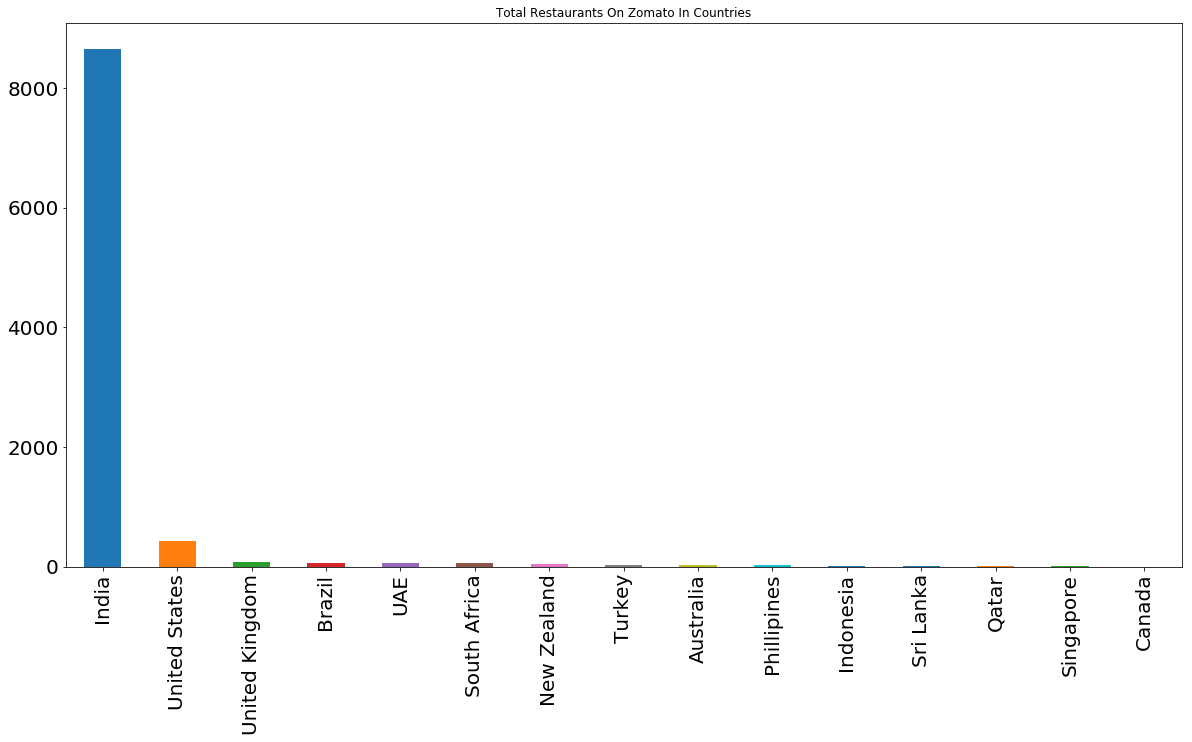

In [30]:
#Find out number of restaurant registered on Zomato across all countries
print(rest_all_data['country'].value_counts())

#plot bar graph
rest_all_data['country'].value_counts().plot(kind='bar',title='Total Restaurants On Zomato In Countries'
                                             ,figsize=(20,10),fontsize=20)




India has highest number of restaurants registered on Zomato in given dataset as seen on graph above.

Let's take restaurants data belonging to India.

In [31]:
rest_india = rest_all_data[rest_all_data['country']=='India']

rest_india['country'].unique()


array(['India'], dtype=object)

In [32]:
rest_india.head(10)

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,average cost for two,currency,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes,country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177,India
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",2000,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133,India
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,2500,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41,India
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",800,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59,India
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",3600,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46,India


In [33]:
rest_india.shape

(8652, 22)

Let's find out how much percentage data for each City of India is in dataset

In [34]:
#Find out percentage of data comprises to each city in India dataset
#as_index option set False to consider city as column of dataframe rather than index
grouped_cities=rest_india.groupby('city',as_index=False)[['restaurant id']].count().sort_values(ascending=False,by='restaurant id')
grouped_cities['total'] = grouped_cities['restaurant id'].sum()
grouped_cities['percent'] = (grouped_cities['restaurant id']/grouped_cities['total'])*100


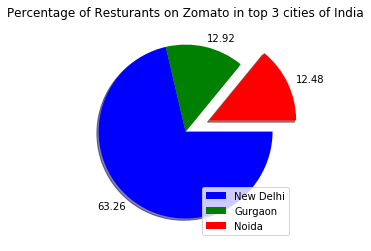

In [35]:
#plot the Pie Chart showing percentage of restaurants in top 3 cities
colors = ['b', 'g', 'r']
explode = (0, 0, 0.3)
label = grouped_cities['city'].head(3)
values = grouped_cities['percent'].head(3).round(2)
plt.pie(values, colors=colors, labels= values ,explode=explode,counterclock=False, shadow=True)
plt.title('Percentage of Resturants on Zomato in top 3 cities of India')
plt.legend(label,loc=4)
plt.show()

Dataset having most of resturants of **New Delhi, Noida and Gurgaon**. Let's get restaurant data of New delhi to initiate more granual level of analysis

In [36]:
rest_new_delhi = rest_india[rest_india['city'] == 'New Delhi']
rest_new_delhi.head()

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,average cost for two,currency,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes,country
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,500,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2,India
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,350,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46,India
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",1500,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45,India
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",500,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11,India
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",500,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238,India


It would be interesting to analyse and see - How people have rated the **"Well known famous Coffee Brands"** in New Delhi.

**Analysis would answer few questions mentioned below:**
1. Which coffee shop is rated highest by customers?
2. Whether people rated "Popular Coffee Shops" with respect to their average cost?
3. What is average cost for each "Well Known" Coffee shops


In [37]:
coffee_shops = ['Costa Coffee','Starbucks','Barista','Cafe Coffee Day']

delhi_coffee_shops = rest_new_delhi[rest_new_delhi['restaurant name'].isin(coffee_shops)]
delhi_coffee_shops = delhi_coffee_shops.groupby('restaurant name',as_index=False)[['aggregate rating','average cost for two']].mean().round(2).sort_values(ascending=False,by='aggregate rating')


Let's visualize this summary on **Bar Chart** to find trends of customers.

**Trends:**
1. Customers prefer and love to have Starbucks coffee though average cost in Starbucks is high as compared to other 3 coffee shops
2. Barista is costlier than Costa Coffee. This seems to be one of the reasons that customers preferred the Costa Coffee over Barista. One more crucial deciding factor missing in dataset is the taste or different flavors of coffee offered in Barista and Costa Coffee.That's the another factor which customer might be taking into consideration when rating coffee shops
3. Question here is whether all people visiting these coffee shops rated them.This confirmation is missing. Trends shown below could drastically change if this missed taken into this analysis

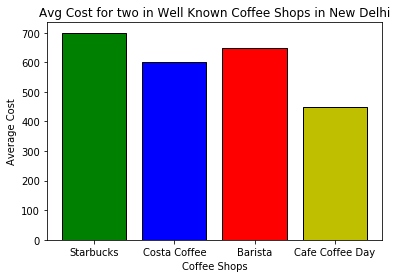

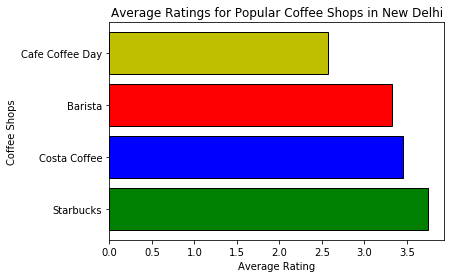

In [38]:
#bar graph to plot average cost for 2 people
costs = delhi_coffee_shops['average cost for two']
rnames = delhi_coffee_shops['restaurant name']
colors = ['g','b','r','y']
plt.bar(rnames,costs,color=colors,edgecolor='black')
plt.title('Avg Cost for two in Well Known Coffee Shops in New Delhi',fontsize=12)
plt.ylabel('Average Cost')
plt.xlabel('Coffee Shops')
plt.show()

#bar graph to plot average ratings of Well known Coffee Shops
ratings = delhi_coffee_shops['aggregate rating']
plt.barh(rnames,ratings,color=colors,edgecolor='black')
plt.title('Average Ratings for Popular Coffee Shops in New Delhi',fontsize=12)
plt.xlabel('Average Rating')
plt.ylabel('Coffee Shops')
plt.show()

Now, It's interesting to see how people rated **"Non-famous local"** Coffee Shops

Trends:
**Green Cafe** was rated at 4.6 average rating by customers which is higher than well known **"Starbucks"**

In [46]:
delhi_local_coffee_shops = rest_new_delhi[(rest_new_delhi['cuisines']=='Cafe') 
                                          & (~rest_new_delhi['restaurant name'].isin(coffee_shops))]

top_coffee_shops=delhi_local_coffee_shops.groupby('restaurant name',as_index=False)[['average cost for two','aggregate rating']].mean().round(2).sort_values(ascending=False,by='aggregate rating')

top_coffee_shops=top_coffee_shops[top_coffee_shops['aggregate rating'] >= 4].sort_values(ascending=False,by='aggregate rating')


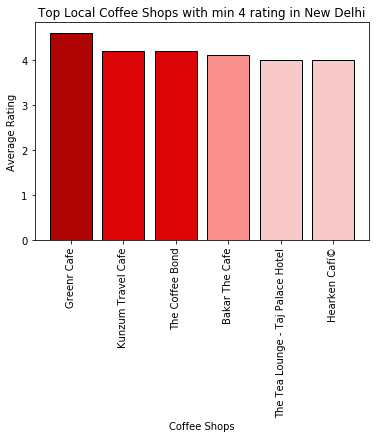

In [47]:
#plot top local coffee with average rating more than 4
rnames = top_coffee_shops['restaurant name']
colors = ['#B00303','#DC0508','#DC0508','#F9908D','#F7CAC9','#F7CAC9']
ratings = top_coffee_shops['aggregate rating']
plt.bar(rnames,ratings,color=colors,edgecolor='black')
plt.title('Top Local Coffee Shops with min 4 rating in New Delhi',fontsize=12)
plt.ylabel('Average Rating')
plt.xlabel('Coffee Shops')
plt.xticks(rotation='vertical')
plt.show()


Let's see which local coffee shops are costly.

**Trends:**
* None of top 6 expensive coffee shops in New Delhi were rated above 4.0 by the customers. Interesting! And these expensive coffee shops operating through well-known multi-star hotels like The Taj Mahal,Le Meridien and The Royal Plaza

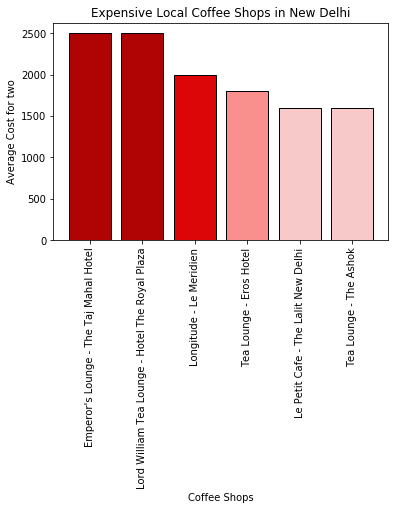

In [69]:
expensive_coffee_shops=delhi_local_coffee_shops.groupby('restaurant name',as_index=False)[['average cost for two','aggregate rating']].mean().round(2).sort_values(ascending=False,by='average cost for two').head(6)

#plot 6 expensive local coffee shops
rnames = expensive_coffee_shops['restaurant name']
colors = ['#B00303','#B00303','#DC0508','#F9908D','#F7CAC9','#F7CAC9']
ratings = expensive_coffee_shops['average cost for two']
plt.bar(rnames,ratings,color=colors,edgecolor='black')
plt.title('Expensive Local Coffee Shops in New Delhi',fontsize=12)
plt.ylabel('Average Cost for two')
plt.xlabel('Coffee Shops')
plt.xticks(rotation='vertical')
plt.show()

With above trends, Let's see correlation between average cost for 2 vs average rating for local coffee shops in New Delhi

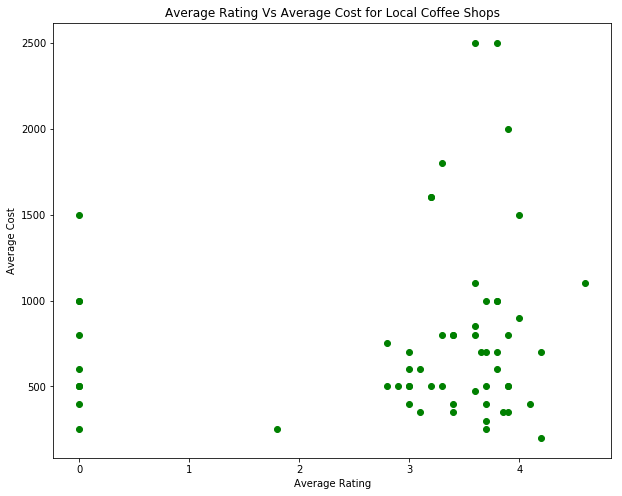

In [70]:
correlation = delhi_local_coffee_shops.groupby('restaurant name',as_index=False)[['average cost for two','aggregate rating']].mean().round(2).sort_values(ascending=False,by='aggregate rating')

#plot scatter graph to analyse correlation
weight = correlation['aggregate rating']
height = correlation['average cost for two']
plt.figure(figsize=(10,8))
plt.scatter(weight,height,c='g',marker='o')
plt.xlabel('Average Rating')
plt.ylabel('Average Cost')
plt.title('Average Rating Vs Average Cost for Local Coffee Shops')
plt.show()